In [271]:
#205212977
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [315]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [316]:
data = pd.read_csv("/content/drive/MyDrive/STATS216/moviesgraded3.csv")

In [317]:
data

,graderank,title,grade,dist,salesus,year,rank,widescreen,salesopen,openscreen,prodcost,genre,mpaa,week2chg,open,close,salesos
0,155,Shrek 2,B,DW,441200000.0,2004,1,4223,108000000.0,4163,150.0,Animation,PG,-33.2,19may2004,25nov2004,478.57380
1,60,Spider-Man 2,B+,Sony,373600000.0,2004,2,4166,88156227.0,4152,200.0,Action / Adventure,PG-13,-48.7,30jun2004,19dec2004,410.21420
2,193,The Passion of the Christ,B,NM,370800000.0,2004,3,3408,83848082.0,3043,30.0,Historical Drama,R,-36.5,25feb2004,29jul2004,241.11710
3,332,Meet the Fockers,B,Uni.,279300000.0,2004,4,3554,46120980.0,3518,80.0,Comedy,PG-13,-31.7,22dec2004,16jun2005,237.33880
4,20,The Incredibles,A-,BV,261400000.0,2004,5,3933,70467623.0,3933,92.0,Animation,PG,-28.7,05nov2004,14apr2005,369.95890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,39,Taken,B+,Fox,145000000.0,2009,13,3184,24717037.0,3183,25.0,Action,PG-13,-16.9,30jan2009,05jul2009,78.89901
174,499,G.I. Joe: The Rise of Cobra,C,Par.,134300000.0,2009,14,4007,54713046.0,4007,175.0,Action,PG-13,-59.2,07aug2009,NaN,146.89330
175,250,Terminator Salvation,B,WB,125300000.0,2009,16,3602,42558390.0,3530,200.0,Sci-Fi Action,PG-13,-61.4,21may2009,NaN,246.00350
176,213,Watchmen,B,WB,107500000.0,2009,18,3611,55214334.0,3611,130.0,Action / Adventure,R,-67.7,06mar2009,28may2009,77.74020


In [318]:
label = "grade"
categorical_features = ["dist"]
numerical_features = ["prodcost", "salesopen", "salesus","salesos"]

features = categorical_features + numerical_features

data = data.dropna()

X = data[features]
X = pd.get_dummies(X, columns=categorical_features)
y = data[label]


In [319]:
X

,prodcost,salesopen,salesus,salesos,dist_BV,dist_DW,dist_Dim.,dist_Focus,dist_Fox,dist_FoxS,...,dist_Rog.,dist_SGem,dist_SonR,dist_Sony,dist_Sum.,dist_Uni.,dist_W/Dim.,dist_WB,dist_WB (NL),dist_YFG
0,150.0,108000000.0,441200000.0,478.57380,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,200.0,88156227.0,373600000.0,410.21420,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,30.0,83848082.0,370800000.0,241.11710,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,80.0,46120980.0,279300000.0,237.33880,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,92.0,70467623.0,261400000.0,369.95890,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,48.0,30517109.0,64506874.0,98.89313,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
165,120.0,18561337.0,43945766.0,49.95424,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
166,50.0,18203876.0,42754105.0,70.48589,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,25.0,24717037.0,145000000.0,78.89901,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [320]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [321]:
X

,prodcost,salesopen,salesus,salesos,dist_BV,dist_DW,dist_Dim.,dist_Focus,dist_Fox,dist_FoxS,...,dist_Rog.,dist_SGem,dist_SonR,dist_Sony,dist_Sum.,dist_Uni.,dist_W/Dim.,dist_WB,dist_WB (NL),dist_YFG
0,150.0,108000000.0,441200000.0,478.57380,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,200.0,88156227.0,373600000.0,410.21420,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,30.0,83848082.0,370800000.0,241.11710,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,80.0,46120980.0,279300000.0,237.33880,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,92.0,70467623.0,261400000.0,369.95890,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,48.0,30517109.0,64506874.0,98.89313,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
165,120.0,18561337.0,43945766.0,49.95424,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
166,50.0,18203876.0,42754105.0,70.48589,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173,25.0,24717037.0,145000000.0,78.89901,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [325]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [326]:
X_train_tensor

tensor([[-9.8985e-01, -5.6614e-01, -2.2167e-01,  ..., -4.0647e-01,
         -8.6711e-02, -8.6711e-02],
        [-1.1206e+00, -5.7010e-01, -6.3551e-01,  ..., -4.0647e-01,
         -8.6711e-02, -8.6711e-02],
        [-9.5715e-01,  1.4232e+00,  2.4252e+00,  ..., -4.0647e-01,
         -8.6711e-02, -8.6711e-02],
        ...,
        [-2.2146e-01,  8.4380e-05, -2.0692e-01,  ..., -4.0647e-01,
         -8.6711e-02, -8.6711e-02],
        [ 1.8725e-01,  5.4466e-02,  6.0515e-01,  ...,  2.4602e+00,
         -8.6711e-02, -8.6711e-02],
        [-5.9748e-01, -2.1894e-02, -2.3010e-01,  ..., -4.0647e-01,
         -8.6711e-02, -8.6711e-02]])

In [327]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [411]:
class FCN(nn.Module):
    def __init__(self, num_features, num_labels, hidden_layers = [15,20]):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_features, hidden_layers[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layers[0] , hidden_layers[1] )
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layers[1], num_labels)

    def forward(self, x):
        out = self.fc1(x)

        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = nn.functional.softmax(out, dim=1) #softmax function
        return out

def l2_penalty(model):
    l2_regularization = torch.tensor(0.)
    for param in model.parameters():
          l2_regularization += torch.norm(param, p=2)**2
    return l2_regularization

def l1_penalty(model):
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
          l1_regularization += torch.norm(param, p=1)
    return l1_regularization

def get_accuracy(model,X_test_tensor,y_test_tensor):
  model.eval()
  with torch.no_grad():
      outputs = model(X_test_tensor)
      _, predicted = torch.max(outputs, 1)
      accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
      return accuracy


In [382]:
num_features = X.shape[1]
num_labels = len(np.unique(y))
hidden_layers=[15,20]
print(num_labels)

7


In [407]:
def train_model(model,lam,regression_penalty = None):
  num_epochs = 50

  criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam Optimzer, based off of SGD
  for epoch in range(num_epochs):
      model.train()
      epoch_loss = 0.0
      for inputs, targets in train_loader:
          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, targets)
          # L2 penalty (weight decay)
          if regression_penalty != None:
            loss += lam * regression_penalty(model)
          else:
            loss = loss

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item() * inputs.size(0)

      epoch_loss /= len(train_loader.dataset)
  return loss







In [408]:
l2_accuracy_list = []
l1_accuracy_list = []

lambda_list = np.logspace(-3, 2, num=10)
for l in lambda_list:
  l2_model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(l2_model,lam= l,regression_penalty = l2_penalty)
  l2_accuracy_list.append(get_accuracy(l2_model,X_test_tensor,y_test_tensor))
  l1_model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(l1_model,lam= l,regression_penalty = l1_penalty)
  l1_accuracy_list.append(get_accuracy(l1_model,X_test_tensor,y_test_tensor))


In [414]:
no_regularizer = []
for l in lambda_list:
  model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(model,lam= l,regression_penalty = None)
  no_regularizer.append(get_accuracy(model,X_test_tensor,y_test_tensor))



In [415]:
print(l2_accuracy_list)
print(l1_accuracy_list)
print(no_regularizer)

[0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471]
[0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.14705882352941177, 0.029411764705882353, 0.5882352941176471]
[0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471]


[0.5882352941176471, 0.5588235294117647, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471]
[1.00000000e-03 3.59381366e-03 1.29154967e-02 4.64158883e-02
 1.66810054e-01 5.99484250e-01 2.15443469e+00 7.74263683e+00
 2.78255940e+01 1.00000000e+02]


4B
Most likely the reason why we get fairly decent results in the clustering with only 2 PCA components is because, most of the important data is likely correlated with each other, meaning we can compress it down to 2 components

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', penalty=None)

In [421]:
lambda_list

array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])

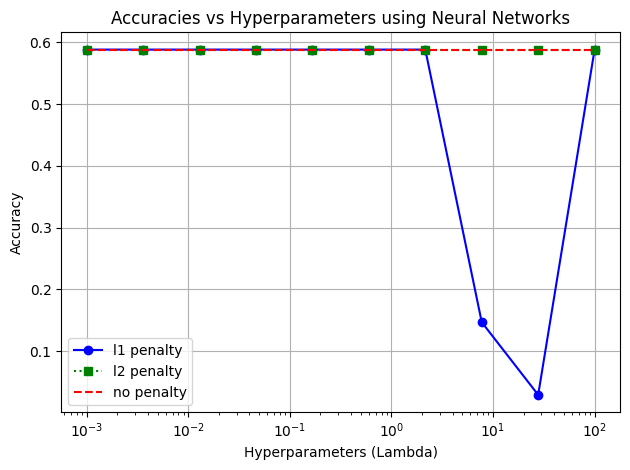

In [420]:
import matplotlib.pyplot as plt
hyperparameters = lambda_list

plt.plot(hyperparameters, l1_accuracy_list, marker='o', linestyle='-', color='b', label='l1 penalty')

# Plotting second set of accuracies
plt.plot(hyperparameters, l2_accuracy_list, marker='s', linestyle=':', color='g', label='l2 penalty')

plt.plot(hyperparameters, no_regularizer, marker=',', linestyle='--', color='r', label='no penalty')

plt.xscale('log')  # Use logarithmic scale for hyperparameters if needed
plt.xlabel('Hyperparameters (Lambda)')
plt.ylabel('Accuracy')
plt.title('Accuracies vs Hyperparameters using Neural Networks')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [396]:
epoch_range = [10,20,30,40,50]
logistic_acc = []
for e in epoch_range:
  logistic_model = LogisticRegression(multi_class='multinomial',penalty = None, max_iter=e)
  logistic_model.fit(X_train, y_train)
  y_pred = logistic_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  logistic_acc.append(accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [397]:
logistic_acc

[0.47058823529411764, 0.5, 0.47058823529411764, 0.5, 0.5]

In [401]:
logistic_l2_penalty = []
for e in epoch_range:
  logistic_model = LogisticRegression(multi_class='multinomial',penalty = "l2", max_iter=e)
  logistic_model.fit(X_train, y_train)
  y_pred = logistic_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  logistic_l2_penalty.append(accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [404]:
logistic_l1_penalty = []
for e in epoch_range:
  logistic_model = LogisticRegression(multi_class='multinomial',solver="saga",penalty = "l1", max_iter=e)
  logistic_model.fit(X_train, y_train)
  y_pred = logistic_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  logistic_l1_penalty.append(accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [402]:
logistic_l2_penalty

[0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471]

In [405]:
logistic_l1_penalty

[0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471]

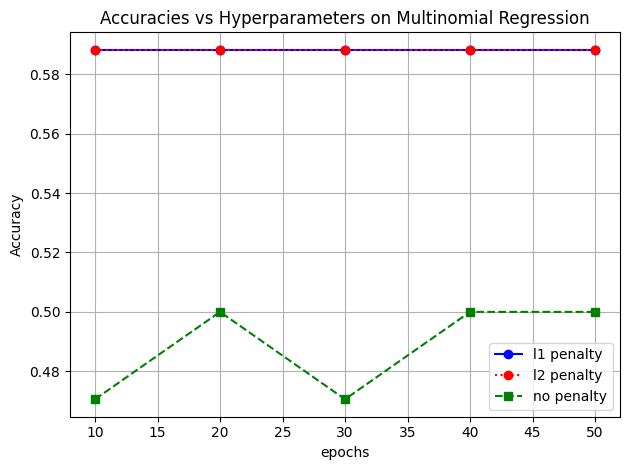

In [424]:
import matplotlib.pyplot as plt
hyperparameters = epoch_range

plt.plot(hyperparameters, logistic_l1_penalty, marker='o', linestyle='-', color='b', label='l1 penalty')
plt.plot(hyperparameters, logistic_l2_penalty, marker='o', linestyle=':', color='r', label='l2 penalty')
# Plotting second set of accuracies
plt.plot(hyperparameters, logistic_acc, marker='s', linestyle='--', color='g', label='no penalty')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracies vs Hyperparameters on Multinomial Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


4D
By inspection Cluster1 matches with EUR, Cluster2 matches with ASN, Cluster3 matches with AMR, and Cluster4 matches with AFR